In [9]:
import pandas as pd
import os

file_path = "C:/Users/anna7/Employee.csv"  # Use the absolute path

# Check if the file exists
if not os.path.exists(file_path):
    print("Error: File not found! Ensure the path is correct.")
else:

    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!\n")

    # Data Exploration
    for col in df.columns:
        print(f"Column: {col}")
        print(f"Unique Values: {df[col].unique()}")
        print(f"Number of Unique Values: {df[col].nunique()}\n")


Dataset loaded successfully!

Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 6

Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 29

Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 40

Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 11

Column: Country
Unique Values: ['India']
Number of Unique Values: 1

Column: Gender
Unique Values: [0 1]
Number of Unique Values: 2



In [11]:
# Statistical analysis
print(df.describe())

              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [18]:
df.rename(columns={'Company': 'company', 'Age': 'age', 'Salary': 'salary', 
                   'Place': 'place', 'Country': 'country', 'Gender': 'gender'}, inplace=True)

In [16]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [20]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64


In [22]:
# Replace inappropriate values
df["age"].replace(0, pd.NA)

0      20.0
1      30.0
2      35.0
3      40.0
4      23.0
       ... 
143    33.0
144    22.0
145    44.0
146    33.0
147    22.0
Name: age, Length: 148, dtype: object

In [24]:
df

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [28]:
# Standardize company names
df["company"] = df["company"].replace({
    "TCS": "Tata Consultancy Services",
    "Infosys Pvt Lmt": "Infosys"
})

# Verify changes
print(df["company"].unique())

['Tata Consultancy Services' 'Infosys' 'CTS' nan 'Congnizant']


In [26]:
df.fillna({"age": df["age"].median(), "salary": df["salary"].median()}, inplace=True)

In [30]:
df.head(30)

,company,age,salary,place,country,gender
0,Tata Consultancy Services,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,Tata Consultancy Services,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,Tata Consultancy Services,23.0,4000.0,Mumbai,India,0
5,Infosys,32.5,5000.0,Calcutta,India,0
6,Tata Consultancy Services,32.5,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,Tata Consultancy Services,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [36]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

In [34]:
# Identify outliers (using IQR)
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
IQR = Q3 - Q1


In [38]:
Q1


3045.0

In [40]:
Q3

7084.0

In [42]:
IQR

4039.0

In [44]:
outliers = df[(df["salary"] < (Q1 - 1.5 * IQR)) | (df["salary"] > (Q3 + 1.5 * IQR))]
print("Outliers:\n", outliers)

Outliers:
 Empty DataFrame
Columns: [company, age, salary, place, country, gender]
Index: []


In [50]:
import matplotlib.pyplot as plt

# Filter data
filtered_data = df[(df["age"] > 40) & (df["salary"] < 5000)]
print(filtered_data)

     company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


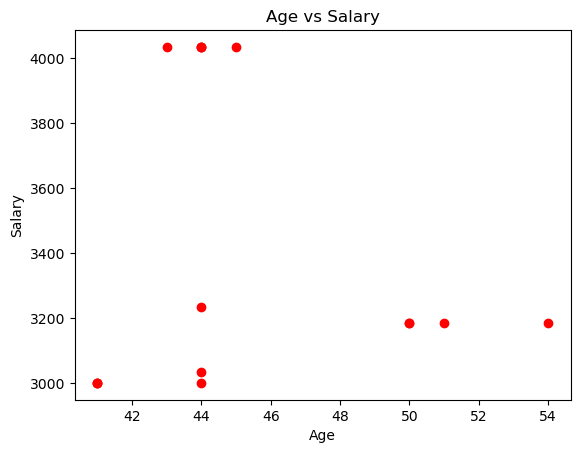

In [52]:
# Plot a chart with age and salary
plt.scatter(filtered_data["age"], filtered_data["salary"], color='red')
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

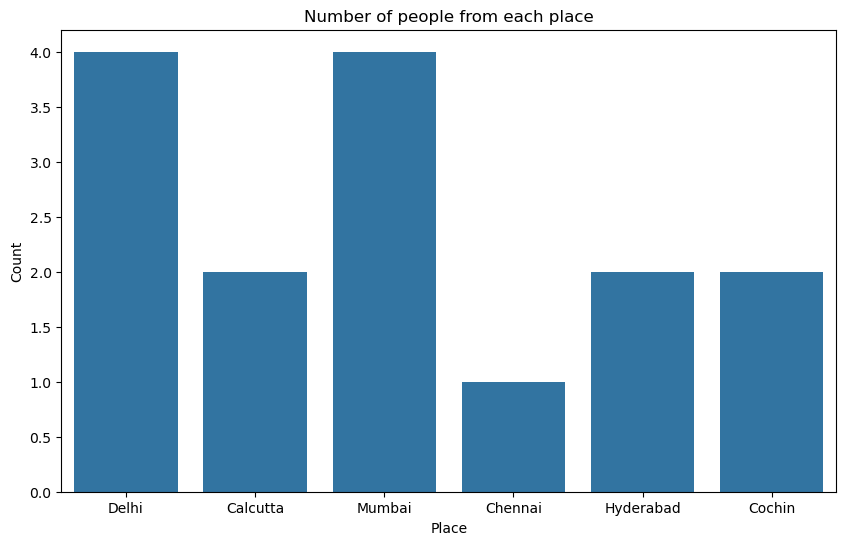

In [54]:
# Count the number of people from each place and represent it visually
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='place')
plt.title('Number of people from each place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder

In [60]:
# Label encoding for "Gender"
label_encoder = LabelEncoder()
filtered_data.loc[:, "country"] = label_encoder.fit_transform(filtered_data["country"]).astype('int32')


In [62]:
filtered_data

,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,0,0
32,Infosys,45.0,4034.0,Calcutta,0,0
39,Infosys,41.0,3000.0,Mumbai,0,0
50,Infosys,41.0,3000.0,Chennai,0,0
57,Infosys,51.0,3184.0,Hyderabad,0,0
68,Infosys,43.0,4034.0,Mumbai,0,0
75,Infosys,44.0,3000.0,Cochin,0,0
86,Infosys,41.0,3000.0,Delhi,0,0
93,Infosys,54.0,3184.0,Mumbai,0,0
104,Infosys,44.0,4034.0,Delhi,0,0


In [64]:
encoded_df = pd.get_dummies(filtered_data, columns=['company', 'place']).astype(int) 
print("\nOne-Hot Encoded DataFrame:")
print(encoded_df)


One-Hot Encoded DataFrame:
     age  salary  country  gender  company_CTS  company_Infosys  \
21    50    3184        0       0            0                1   
32    45    4034        0       0            0                1   
39    41    3000        0       0            0                1   
50    41    3000        0       0            0                1   
57    51    3184        0       0            0                1   
68    43    4034        0       0            0                1   
75    44    3000        0       0            0                1   
86    41    3000        0       0            0                1   
93    54    3184        0       0            0                1   
104   44    4034        0       0            0                1   
122   44    3234        0       0            0                1   
129   50    3184        0       0            0                1   
138   44    3033        0       0            1                0   
140   44    4034        0       0 

In [68]:
print(encoded_df.columns)

Index(['age', 'salary', 'country', 'gender', 'company_CTS', 'company_Infosys',
       'place_Calcutta', 'place_Chennai', 'place_Cochin', 'place_Delhi',
       'place_Hyderabad', 'place_Mumbai'],
      dtype='object')


In [74]:
encoded_df

,age,salary,country,gender,company_CTS,company_Infosys,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai
21,50,3184,0,0,0,1,0,0,0,1,0,0
32,45,4034,0,0,0,1,1,0,0,0,0,0
39,41,3000,0,0,0,1,0,0,0,0,0,1
50,41,3000,0,0,0,1,0,1,0,0,0,0
57,51,3184,0,0,0,1,0,0,0,0,1,0
68,43,4034,0,0,0,1,0,0,0,0,0,1
75,44,3000,0,0,0,1,0,0,1,0,0,0
86,41,3000,0,0,0,1,0,0,0,1,0,0
93,54,3184,0,0,0,1,0,0,0,0,0,1
104,44,4034,0,0,0,1,0,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaler
standard_scaler = StandardScaler()
df_scaled_standard = encoded_df.copy()
df_scaled_standard[["age", "salary"]] = standard_scaler.fit_transform(df[["age", "salary"]])

In [80]:
print(df_scaled_standard.head())

   age  salary  country  gender  company_CTS  company_Infosys  place_Calcutta  \
0   50    3184        0       0            0                1               0   
1   45    4034        0       0            0                1               1   
2   41    3000        0       0            0                1               0   
3   41    3000        0       0            0                1               0   
4   51    3184        0       0            0                1               0   

   place_Chennai  place_Cochin  place_Delhi  place_Hyderabad  place_Mumbai  
0              0             0            1                0             0  
1              0             0            0                0             0  
2              0             0            0                0             1  
3              1             0            0                0             0  
4              0             0            0                1             0  


In [ ]:
# MinMax Scaler
minmax_scaler = MinMaxScaler()
df_scaled_minmax = encoded_df.copy()
df_scaled_minmax[["age", "salary"]] = minmax_scaler.fit_transform(df[["age", "salary"]])

In [84]:
print(df_scaled_minmax.head())

   age  salary  country  gender  company_CTS  company_Infosys  place_Calcutta  \
0   50    3184        0       0            0                1               0   
1   45    4034        0       0            0                1               1   
2   41    3000        0       0            0                1               0   
3   41    3000        0       0            0                1               0   
4   51    3184        0       0            0                1               0   

   place_Chennai  place_Cochin  place_Delhi  place_Hyderabad  place_Mumbai  
0              0             0            1                0             0  
1              0             0            0                0             0  
2              0             0            0                0             1  
3              1             0            0                0             0  
4              0             0            0                1             0  
